In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
#csvの場合
#df=pd.read_csv("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/miecyuuo/fft_data.csv",index_col=None,use_cols =[0,1], encoding="cp932")

#excelの場合

df1=pd.read_excel("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/miecyuuo/fft_data.xlsx", index_col=0, use_cols =[0,1], sheet_name=0, encoding="cp932")
df2=pd.read_excel("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/miecyuuo/fft_data.xlsx", index_col=0, use_cols =[0,1], sheet_name=1, encoding="cp932")
df3=pd.read_excel("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/miecyuuo/fft_data.xlsx", index_col=0, use_cols =[0,1], sheet_name=2, encoding="cp932")
df4=pd.read_excel("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/miecyuuo/fft_data.xlsx", index_col=0, use_cols =[0,1], sheet_name=3, encoding="cp932")

In [3]:
df3.head()

,Mod
Hz-m/s2,
8,0.0
9,0.0
10,0.0
11,0.0
12,0.0


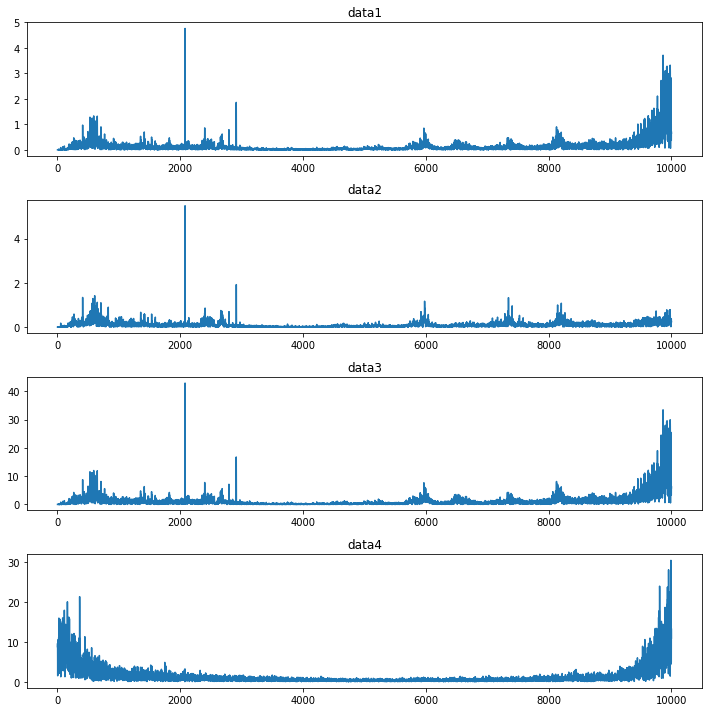

In [4]:
#スペクトルの表示
plt.figure(figsize=(10, 10))

plt.subplot(4,1,1)
plt.plot(df1)
plt.title("data1")

plt.subplot(4,1,2)
plt.plot(df2)
plt.title("data2")

plt.subplot(4,1,3)
plt.plot(df3)
plt.title("data3")

plt.subplot(4,1,4)
plt.plot(df4)
plt.title("data4")

plt.tight_layout() 


In [5]:
#面積（合計）

sum1=df1.iloc[:,0].sum()
sum2=df2.iloc[:,0].sum()
sum3=df3.iloc[:,0].sum()
sum4=df4.iloc[:,0].sum()

area=pd.DataFrame({"Area":pd.Series([sum1,sum2,sum3,sum4], index=("data1", "data2","data3","data4"))})
area


,Area
data1,1543.68
data2,1156.78
data3,13926.06
data4,13926.06


In [6]:
#基本統計量
print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df4.describe())

       2019-11-13 15:55:53
count          9993.000000
mean              0.154476
std               0.277458
min               0.000000
25%               0.030000
50%               0.080000
75%               0.170000
max               4.760000
       2019-11-13 16:08:31
count          9993.000000
mean              0.115759
std               0.143757
min               0.000000
25%               0.030000
50%               0.080000
75%               0.150000
max               5.480000
               Mod
count  9993.000000
mean      1.393582
std       2.503041
min       0.000000
25%       0.270640
50%       0.721707
75%       1.533628
max      42.941572
       2019-11-13 13:27:06
count          9993.000000
mean              1.393582
std               2.223470
min               0.000000
25%               0.370000
50%               0.660000
75%               1.330000
max              30.390000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B961193DD8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B960396940>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B960750550>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9608D9160>]]


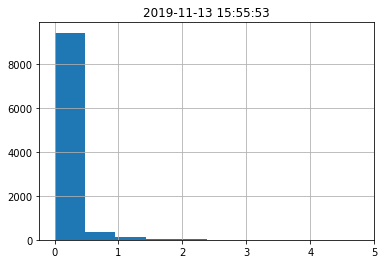

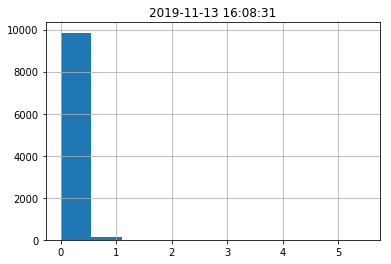

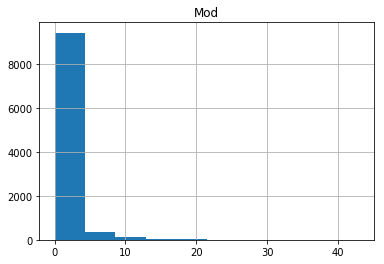

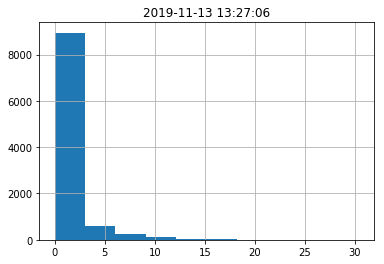

In [7]:
#ヒストグラム
print(df1.hist())
print(df2.hist())
print(df3.hist())
print(df4.hist())

In [8]:
#ndarrayを取得
array_df1=df1.values.reshape([-1])
array_df2=df2.values.reshape([-1])
array_df3=df3.values.reshape([-1])
array_df4=df4.values.reshape([-1])

In [9]:
array_df1

array([0.  , 0.  , 0.  , ..., 0.37, 0.72, 0.65])

In [10]:
#相関係数(スピアマン順位相関係数) (参考)

corr_sp_1_2, pvalue1=stats.spearmanr(array_df1, array_df2)
corr_sp_1_3, pvalue2=stats.spearmanr(array_df1, array_df3)
corr_sp_1_4, pvalue3=stats.spearmanr(array_df1, array_df4)
corr_sp_2_3, pvalue4=stats.spearmanr(array_df2, array_df3)
corr_sp_2_4, pvalue4=stats.spearmanr(array_df2, array_df4)
corr_sp_3_4, pvalue4=stats.spearmanr(array_df2, array_df4)

corr_sp=pd.DataFrame({"Corr_sp":pd.Series([corr_sp_1_2,corr_sp_1_3,corr_sp_1_4,corr_sp_2_3,corr_sp_2_4,corr_sp_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
corr_sp


,Corr_sp
1_2,0.599979
1_3,1.000000
1_4,0.391197
2_3,0.599979
2_4,0.323303
3_4,0.323303


In [12]:
#相関係数(ピアソン) 

d1_mu, d1_sigma = array_df1.mean(), array_df1.std()
d2_mu, d2_sigma = array_df2.mean(), array_df2.std()
d3_mu, d3_sigma = array_df3.mean(), array_df3.std()
d4_mu, d4_sigma = array_df4.mean(), array_df4.std()

cov1_2 = sum([(d1i - d1_mu) * (d2i - d2_mu) for d1i, d2i in zip(array_df1, array_df2)]) / len(array_df1)
corr_pia_1_2 = cov1_2 / (d1_sigma * d2_sigma)

cov1_3 = sum([(d1i - d1_mu) * (d3i - d3_mu) for d1i, d3i in zip(array_df1, array_df3)]) / len(array_df1)
corr_pia_1_3 = cov1_3 / (d1_sigma * d3_sigma)

cov1_4 = sum([(d1i - d1_mu) * (d4i - d4_mu) for d1i, d4i in zip(array_df1, array_df4)]) / len(array_df1)
corr_pia_1_4 = cov1_4 / (d1_sigma * d4_sigma)

cov2_3 = sum([(d2i - d2_mu) * (d3i - d3_mu) for d2i, d3i in zip(array_df2, array_df3)]) / len(array_df1)
corr_pia_2_3 = cov2_3 / (d2_sigma * d3_sigma)

cov2_4 = sum([(d2i - d2_mu) * (d4i - d4_mu) for d2i, d4i in zip(array_df2, array_df4)]) / len(array_df1)
corr_pia_2_4 = cov2_4 / (d2_sigma * d4_sigma)

cov3_4 = sum([(d3i - d3_mu) * (d4i - d4_mu) for d3i, d4i in zip(array_df3, array_df4)]) / len(array_df1)
corr_pia_3_4 = cov3_4 / (d3_sigma * d4_sigma)

corr_pia=pd.DataFrame({"Corr_pia":pd.Series([corr_pia_1_2,corr_pia_1_3,corr_pia_1_4,corr_pia_2_3,corr_pia_2_4,corr_pia_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4",))})
corr_pia


,Corr_pia
1_2,0.466704
1_3,1.000000
1_4,0.489028
2_3,0.466704
2_4,0.197446
3_4,0.489028


In [13]:
#共分散
cov=pd.DataFrame({"Cov":pd.Series([cov1_2,cov1_3,cov1_4,cov2_3,cov2_4,cov3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
cov

,Cov
1_2,0.018613
1_3,0.694419
1_4,0.301661
2_3,0.167917
2_4,0.063105
3_4,2.721383


In [14]:
#コヒーレンスを求める為にIFFT
""""fs=32768  #サンプリング周波数 [Hz]
T=1       #取り込み時間 [s]
N=fs*T
freq=np.linspace(8,10001, 9993) #周波数軸
t=np.arange(0,T, 1/fs) #時間軸

#IFFT
ifft_1=np.fft.ifft(array_df1, norm = 'ortho')
ifft_2=np.fft.ifft(array_df2, norm = 'ortho') 
ifft_3=np.fft.ifft(array_df3, norm = 'ortho')
ifft_4=np.fft.ifft(array_df4, norm = 'ortho')

#実部の取り出し
real_1=np.real(ifft_1)
real_2=np.real(ifft_2)
real_3=np.real(ifft_3)
real_4=np.real(ifft_4)

tmax=tmax=len(real_1)*(1/fs)
t=np.arange(0, tmax, 1/fs) #時間軸
"""

'"fs=32768  #サンプリング周波数 [Hz]\nT=1       #取り込み時間 [s]\nN=fs*T\nfreq=np.linspace(8,10001, 9993) #周波数軸\nt=np.arange(0,T, 1/fs) #時間軸\n\n#IFFT\nifft_1=np.fft.ifft(array_df1, norm = \'ortho\')\nifft_2=np.fft.ifft(array_df2, norm = \'ortho\') \nifft_3=np.fft.ifft(array_df3, norm = \'ortho\')\nifft_4=np.fft.ifft(array_df4, norm = \'ortho\')\n\n#実部の取り出し\nreal_1=np.real(ifft_1)\nreal_2=np.real(ifft_2)\nreal_3=np.real(ifft_3)\nreal_4=np.real(ifft_4)\n\ntmax=tmax=len(real_1)*(1/fs)\nt=np.arange(0, tmax, 1/fs) #時間軸\n'

In [15]:
""""#FFT（確認）
fft_1=np.fft.fft(ifft_1, norm = 'ortho') 
fft_2=np.fft.fft(ifft_2, norm = 'ortho')
fft_3=np.fft.fft(ifft_3, norm = 'ortho')  
fft_4=np.fft.fft(ifft_4, norm = 'ortho') 
Amp_1=np.abs(fft_1)
Amp_2=np.abs(fft_2)
Amp_3=np.abs(fft_3)
Amp_4=np.abs(fft_4)
"""

'"#FFT（確認）\nfft_1=np.fft.fft(ifft_1, norm = \'ortho\') \nfft_2=np.fft.fft(ifft_2, norm = \'ortho\')\nfft_3=np.fft.fft(ifft_3, norm = \'ortho\')  \nfft_4=np.fft.fft(ifft_4, norm = \'ortho\') \nAmp_1=np.abs(fft_1)\nAmp_2=np.abs(fft_2)\nAmp_3=np.abs(fft_3)\nAmp_4=np.abs(fft_4)\n'

In [16]:
"""
#TW(IFFT)のプロット

plt.figure(figsize=(10,10))

plt.subplot(411)
plt.plot(t, real_1)
plt.title("data1")

plt.subplot(412)
plt.plot(freq, Amp_1)
plt.title("data1_FFT")

plt.subplot(413)
plt.plot(t, real_4)
plt.title("data4")

plt.subplot(414)
plt.plot(freq, Amp_4)
plt.title("data4_FFT")

plt.tight_layout() 
"""


'\n#TW(IFFT)のプロット\n\nplt.figure(figsize=(10,10))\n\nplt.subplot(411)\nplt.plot(t, real_1)\nplt.title("data1")\n\nplt.subplot(412)\nplt.plot(freq, Amp_1)\nplt.title("data1_FFT")\n\nplt.subplot(413)\nplt.plot(t, real_4)\nplt.title("data4")\n\nplt.subplot(414)\nplt.plot(freq, Amp_4)\nplt.title("data4_FFT")\n\nplt.tight_layout() \n'

In [17]:
"""
#コヒーレンス（参考）
from matplotlib import mlab
from scipy import signal

Coh_1_4 = mlab.cohere(real_1, real_4, Fs=32768, NFFT=9993/2, window=mlab.window_hanning, noverlap=0)

plt.figure()
plt.plot(freq, Coh_1_4)
"""

'\n#コヒーレンス（参考）\nfrom matplotlib import mlab\nfrom scipy import signal\n\nCoh_1_4 = mlab.cohere(real_1, real_4, Fs=32768, NFFT=9993/2, window=mlab.window_hanning, noverlap=0)\n\nplt.figure()\nplt.plot(freq, Coh_1_4)\n'

In [18]:
#KLダイバージェンス

#epsilon=.00001 を足して計算できるようにする
epsilon=.00001

# data1で規準化
array_df1_std=(array_df1+epsilon)/np.sum(array_df1)
array_df2_std=(array_df2+epsilon)/np.sum(array_df1)
array_df3_std=(array_df3+epsilon)/np.sum(array_df1)
array_df4_std=(array_df4+epsilon)/np.sum(array_df1)

kldiv_1_2=stats.entropy(array_df1_std, array_df4_std)
kldiv_1_3=stats.entropy(array_df1_std, array_df4_std)
kldiv_1_4=stats.entropy(array_df1_std, array_df4_std)
kldiv_2_3=stats.entropy(array_df2_std, array_df3_std)
kldiv_3_4=stats.entropy(array_df3_std, array_df4_std)
kldiv_2_4=stats.entropy(array_df2_std, array_df4_std)

kldiv=pd.DataFrame({"KLdiv":pd.Series([kldiv_1_2,kldiv_1_3,kldiv_1_4,kldiv_2_3,kldiv_2_4,kldiv_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
kldiv

,KLdiv
1_2,0.617004
1_3,0.617004
1_4,0.617004
2_3,0.582201
2_4,0.791294
3_4,0.617058


In [19]:
#JSダイバージェンス

kldiv_2_1=stats.entropy(array_df2_std, array_df1_std)
kldiv_3_1=stats.entropy(array_df3_std, array_df1_std)
kldiv_4_1=stats.entropy(array_df4_std, array_df1_std)
kldiv_3_2=stats.entropy(array_df3_std, array_df2_std)
kldiv_4_3=stats.entropy(array_df4_std, array_df3_std)
kldiv_4_2=stats.entropy(array_df4_std, array_df2_std)

jsdiv_1_2=0.5*(kldiv_1_2+kldiv_2_1)
jsdiv_1_3=0.5*(kldiv_1_3+kldiv_3_1)
jsdiv_1_4=0.5*(kldiv_1_4+kldiv_4_1)
jsdiv_2_3=0.5*(kldiv_2_3+kldiv_3_2)
jsdiv_3_4=0.5*(kldiv_3_4+kldiv_4_3)
jsdiv_2_4=0.5*(kldiv_2_4+kldiv_4_2)

jsdiv=pd.DataFrame({"JSdiv":pd.Series([jsdiv_1_2,jsdiv_1_3,jsdiv_1_4,jsdiv_2_3,jsdiv_2_4,jsdiv_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
jsdiv


,JSdiv
1_2,0.587720
1_3,0.308503
1_4,0.810594
2_3,0.567307
2_4,0.923475
3_4,0.847503


In [20]:
# Histogram Intersectionを計算　（参考）
#大きいほど分布は類似

#data1で規準化
def calc_hist_intersection(hist1, hist2):
    total = 0
    for i in range(len(hist1)):
        total += min(hist1[i], hist2[i])
    return float(total)/sum(array_df1)

In [21]:
hi_1_2=calc_hist_intersection(array_df1,array_df4)
hi_1_3=calc_hist_intersection(array_df1,array_df3)
hi_1_4=calc_hist_intersection(array_df1,array_df4)
hi_2_3=calc_hist_intersection(array_df2,array_df3)
hi_3_4=calc_hist_intersection(array_df3,array_df4)
hi_2_4=calc_hist_intersection(array_df2,array_df4)

hi=pd.DataFrame({"HI":pd.Series([hi_1_2,hi_1_3,hi_1_4,hi_2_3,hi_2_4,hi_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
hi
    

,HI
1_2,0.971283
1_3,1.000000
1_4,0.971283
2_3,0.736677
2_4,0.719929
3_4,5.330599


In [22]:
array_df1

array([0.  , 0.  , 0.  , ..., 0.37, 0.72, 0.65])

In [23]:
#L2ノルム
#axis=0 で列毎のベクトルノルムをとり行ベクトルを求める

array1_2=np.vstack([array_df1, array_df2])
array1_3=np.vstack([array_df1, array_df3])
array1_4=np.vstack([array_df1, array_df4])
array2_3=np.vstack([array_df3, array_df3])
array3_4=np.vstack([array_df3, array_df4])
array2_4=np.vstack([array_df2, array_df4])

#合計で評価
l2_1_2 = sum(np.linalg.norm(array1_2, ord=2, axis=0))
l2_1_3 = sum(np.linalg.norm(array1_3, ord=2, axis=0))
l2_1_4 = sum(np.linalg.norm(array1_4, ord=2, axis=0))
l2_2_3 = sum(np.linalg.norm(array2_3, ord=2, axis=0))
l2_3_4 = sum(np.linalg.norm(array3_4, ord=2, axis=0))
l2_2_4 = sum(np.linalg.norm(array2_4, ord=2, axis=0))

#コサイン類似度　（参考）
norm_data1=norm1=array_df1/np.linalg.norm(array_df1, ord=2)
norm_data2=norm2=array_df2/np.linalg.norm(array_df2, ord=2)
norm_data3=norm3=array_df3/np.linalg.norm(array_df3, ord=2)
norm_data4=norm4=array_df4/np.linalg.norm(array_df4, ord=2)

cos1_2=np.dot(norm_data1, norm_data2)
cos1_3=np.dot(norm_data1, norm_data3)
cos1_4=np.dot(norm_data1, norm_data4)
cos2_3=np.dot(norm_data2, norm_data3)
cos3_4=np.dot(norm_data3, norm_data4)
cos2_4=np.dot(norm_data2, norm_data4)


l2=pd.DataFrame({"L2":pd.Series([l2_1_2,l2_1_3,l2_1_4,l2_2_3,l2_2_4,l2_3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
print(l2)

cos=pd.DataFrame({"Cos":pd.Series([cos1_2,cos1_3,cos1_4,cos2_3,cos2_4,cos3_4], index=("1_2","1_3","1_4","2_3","2_4","3_4"))})
print(cos)


               L2
1_2   2097.030517
1_3  14011.355932
1_4  14155.263606
2_3  19694.422922
2_4  14102.069702
3_4  21843.896632
          Cos
1_2  0.622696
1_3  1.000000
1_4  0.620383
2_3  0.622696
2_4  0.463402
3_4  0.620383


In [24]:
eva=pd.concat([corr_sp,corr_pia,cov,kldiv,jsdiv,hi,l2,cos],axis=1)
eva

,Corr_sp,Corr_pia,Cov,KLdiv,JSdiv,HI,L2,Cos
1_2,0.599979,0.466704,0.018613,0.617004,0.587720,0.971283,2097.030517,0.622696
1_3,1.000000,1.000000,0.694419,0.617004,0.308503,1.000000,14011.355932,1.000000
1_4,0.391197,0.489028,0.301661,0.617004,0.810594,0.971283,14155.263606,0.620383
2_3,0.599979,0.466704,0.167917,0.582201,0.567307,0.736677,19694.422922,0.622696
2_4,0.323303,0.197446,0.063105,0.791294,0.923475,0.719929,14102.069702,0.463402
3_4,0.323303,0.489028,2.721383,0.617058,0.847503,5.330599,21843.896632,0.620383


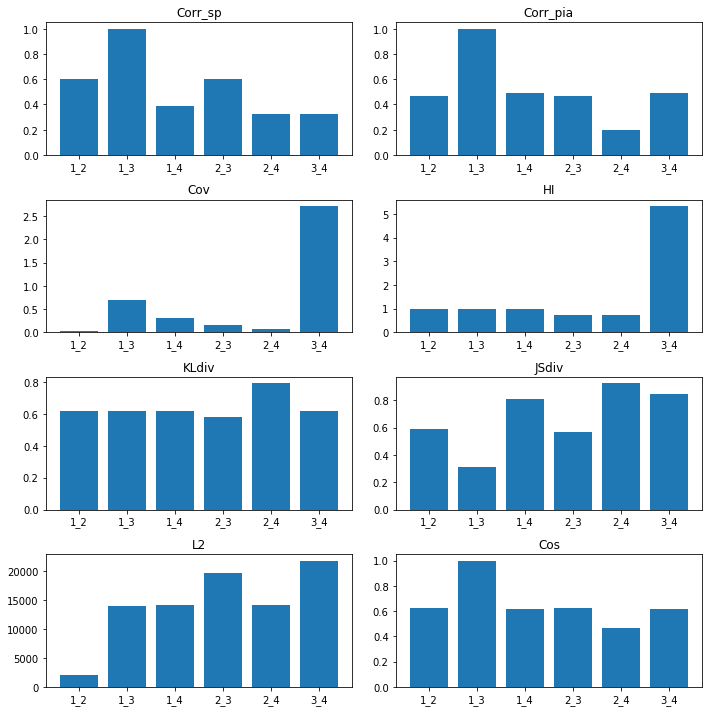

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(4,2,1)
plt.bar(left=eva.index, height=eva["Corr_sp"])
plt.title("Corr_sp")

plt.subplot(4,2,2)
plt.bar(left=eva.index, height=eva["Corr_pia"])
plt.title("Corr_pia")

plt.subplot(4,2,3)
plt.bar(left=eva.index, height=eva["Cov"])
plt.title("Cov")

plt.subplot(4,2,4)
plt.bar(left=eva.index, height=eva["HI"])
plt.title("HI")

plt.subplot(4,2,5)
plt.bar(left=eva.index, height=eva["KLdiv"])
plt.title("KLdiv")

plt.subplot(4,2,6)
plt.bar(left=eva.index, height=eva["JSdiv"])
plt.title("JSdiv")

plt.subplot(4,2,7)
plt.bar(left=eva.index, height=eva["L2"])
plt.title("L2")

plt.subplot(4,2,8)
plt.bar(left=eva.index, height=eva["Cos"])
plt.title("Cos")

plt.tight_layout() 

#面積だけではスペクトルの形状が異なっていても検知できない事がある(ex.3-4)。
#1-2以外は全て差異を検知したい。
#CovかL2が良い
#差異を検知してもRMSが下がっている場合はアラームを出す必要がない、よって別途RMSがマイナス時はアラームを出さないようにする（共通）。


Text(0.5,1,'Area')

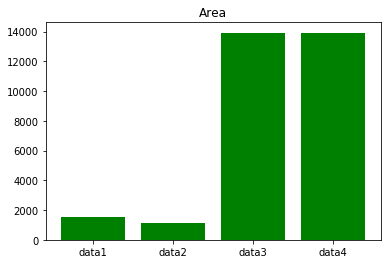

In [26]:
plt.bar(left=area.index, height=area["Area"], color="g")
plt.title("Area")

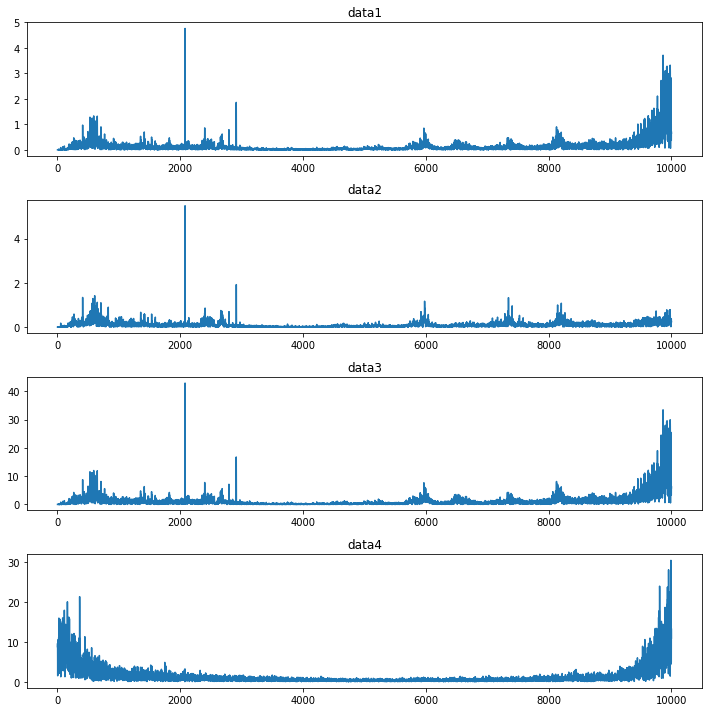

In [27]:
#スペクトルの表示(再)
plt.figure(figsize=(10, 10))

plt.subplot(4,1,1)
plt.plot(df1)
plt.title("data1")

plt.subplot(4,1,2)
plt.plot(df2)
plt.title("data2")

plt.subplot(4,1,3)
plt.plot(df3)
plt.title("data3")

plt.subplot(4,1,4)
plt.plot(df4)
plt.title("data4")

plt.tight_layout() 